In [1]:
#Loading the libraries and the data
#pip install numpy
#pip install matplotlib
#pip install sklearn
#pip install pandas
#pip install -U scikit-learn
#pip install statsmodels
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
#for readable figures
pd.set_option('float_format', '{:f}'.format)
iris = pd.read_csv("D:\SADIQ\MSc\SEM 2\AMDL\PRAC\Prac3\Iris.csv")
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1       5.100000      3.500000       1.400000      0.200000  Iris-setosa
1   2       4.900000      3.000000       1.400000      0.200000  Iris-setosa
2   3       4.700000      3.200000       1.300000      0.200000  Iris-setosa
3   4       4.600000      3.100000       1.500000      0.200000  Iris-setosa
4   5       5.000000      3.600000       1.400000      0.200000  Iris-setosa

In [2]:
x = iris.drop('Species', axis=1)
y = iris['Species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [3]:
#Fit the model
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [4]:
# Model validation
# print the accuracy and error rate:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 1.00
Error rate: 0.00


In [5]:
# look at the scores from cross validation:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [6]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [7]:
#look at the confusion matrix:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


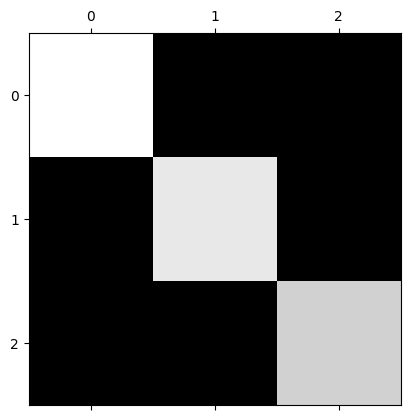

In [8]:
#If you have many variables, it makes sense to plot the confusion matrix:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [9]:
#Calculated probabilities
#get the probabilities of the predicted classes
probability = log_reg.predict_proba(testX)
probability

array([[9.58467929e-01, 4.15320711e-02, 1.36320004e-26],
       [1.00000000e+00, 1.98269710e-10, 7.44548046e-49],
       [9.99846634e-01, 1.53365580e-04, 4.33370065e-33],
       [9.01705583e-11, 9.99999934e-01, 6.63063305e-08],
       [1.00000000e+00, 2.44142550e-11, 3.97348370e-51],
       [3.72482426e-16, 4.24948652e-01, 5.75051348e-01],
       [9.97527411e-01, 2.47258859e-03, 1.30374024e-29],
       [9.99999998e-01, 1.61476284e-09, 1.32142480e-46],
       [1.69061753e-08, 9.99999983e-01, 5.02304290e-12],
       [7.95602158e-01, 2.04397842e-01, 1.43158783e-24],
       [6.78676963e-03, 9.93213230e-01, 1.89856816e-21],
       [2.09184624e-17, 1.01411908e-01, 8.98588092e-01],
       [1.16832083e-41, 5.20456642e-17, 1.00000000e+00],
       [3.66837223e-08, 9.99999963e-01, 1.76447507e-12],
       [9.99987538e-01, 1.24615654e-05, 5.57318221e-36],
       [8.06320733e-11, 9.99999976e-01, 2.37556581e-08],
       [1.04291158e-50, 8.58348774e-23, 1.00000000e+00],
       [1.59988654e-47, 1.35303

In [10]:
#Each column here represents a class. The class with the highest probability is,the output of the predicted class. 
#Here we can see that the length of the,probability data is the same as the length of the test data.
print(probability.shape[0])
print(testX.shape[0])

30
30


In [11]:
#output into shape and a readable format
df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()
#with the .classes_ function we get the order of the classes that Python gave.

Iris-setosa  Iris-versicolor  Iris-virginica
0     0.958468         0.041532        0.000000
1     1.000000         0.000000        0.000000
2     0.999847         0.000153        0.000000
3     0.000000         1.000000        0.000000
4     1.000000         0.000000        0.000000

In [12]:
#sum of the probabilities must always be 1
df['sum'] = df.sum(axis=1)
df.head()

Iris-setosa  Iris-versicolor  Iris-virginica      sum
0     0.958468         0.041532        0.000000 1.000000
1     1.000000         0.000000        0.000000 1.000000
2     0.999847         0.000153        0.000000 1.000000
3     0.000000         1.000000        0.000000 1.000000
4     1.000000         0.000000        0.000000 1.000000

In [13]:
# add the predicted classes...
df['predicted_class'] = y_pred
df.head()

Iris-setosa  Iris-versicolor  Iris-virginica      sum  predicted_class
0     0.958468         0.041532        0.000000 1.000000      Iris-setosa
1     1.000000         0.000000        0.000000 1.000000      Iris-setosa
2     0.999847         0.000153        0.000000 1.000000      Iris-setosa
3     0.000000         1.000000        0.000000 1.000000  Iris-versicolor
4     1.000000         0.000000        0.000000 1.000000      Iris-setosa

In [14]:
#actual classes:
df['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
df.head()

Iris-setosa  Iris-versicolor  Iris-virginica      sum  predicted_class  \
0     0.958468         0.041532        0.000000 1.000000      Iris-setosa   
1     1.000000         0.000000        0.000000 1.000000      Iris-setosa   
2     0.999847         0.000153        0.000000 1.000000      Iris-setosa   
3     0.000000         1.000000        0.000000 1.000000  Iris-versicolor   
4     1.000000         0.000000        0.000000 1.000000      Iris-setosa   

      actual_class  
0      Iris-setosa  
1      Iris-setosa  
2      Iris-setosa  
3  Iris-versicolor  
4      Iris-setosa

In [15]:
#do a plausibility check whether the classes were predicted correctly.
le = preprocessing.LabelEncoder()
df['label_pred'] = le.fit_transform(df['predicted_class'])
df['label_actual'] = le.fit_transform(df['actual_class'])
df.head()

Iris-setosa  Iris-versicolor  Iris-virginica      sum  predicted_class  \
0     0.958468         0.041532        0.000000 1.000000      Iris-setosa   
1     1.000000         0.000000        0.000000 1.000000      Iris-setosa   
2     0.999847         0.000153        0.000000 1.000000      Iris-setosa   
3     0.000000         1.000000        0.000000 1.000000  Iris-versicolor   
4     1.000000         0.000000        0.000000 1.000000      Iris-setosa   

      actual_class  label_pred  label_actual  
0      Iris-setosa           0             0  
1      Iris-setosa           0             0  
2      Iris-setosa           0             0  
3  Iris-versicolor           1             1  
4      Iris-setosa           0             0

In [16]:
#see that the two variables (predicted_class & actual_class) were coded the ,same and can therefore be continued properly
targets = df['predicted_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [17]:
targets = df['actual_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [18]:
#plausibility check whether the classes were predicted correctly. 
#If the result,of subtraction is 0, it was a correct estimate of the model.
df['check'] = df['label_actual'] - df['label_pred']
df.head(7)

Iris-setosa  Iris-versicolor  Iris-virginica      sum  predicted_class  \
0     0.958468         0.041532        0.000000 1.000000      Iris-setosa   
1     1.000000         0.000000        0.000000 1.000000      Iris-setosa   
2     0.999847         0.000153        0.000000 1.000000      Iris-setosa   
3     0.000000         1.000000        0.000000 1.000000  Iris-versicolor   
4     1.000000         0.000000        0.000000 1.000000      Iris-setosa   
5     0.000000         0.424949        0.575051 1.000000   Iris-virginica   
6     0.997527         0.002473        0.000000 1.000000      Iris-setosa   

      actual_class  label_pred  label_actual  check  
0      Iris-setosa           0             0      0  
1      Iris-setosa           0             0      0  
2      Iris-setosa           0             0      0  
3  Iris-versicolor           1             1      0  
4      Iris-setosa           0             0      0  
5   Iris-virginica           2             2      0  
6      Iris-setosa           0             0      0

In [19]:
#For better orientation, we give the observations descriptive names and delete,unnecessary columns.
df['correct_prediction?'] = np.where(df['check'] == 0, 'True', 'False')
df = df.drop(['label_pred', 'label_actual', 'check'], axis=1)
df.head()

Iris-setosa  Iris-versicolor  Iris-virginica      sum  predicted_class  \
0     0.958468         0.041532        0.000000 1.000000      Iris-setosa   
1     1.000000         0.000000        0.000000 1.000000      Iris-setosa   
2     0.999847         0.000153        0.000000 1.000000      Iris-setosa   
3     0.000000         1.000000        0.000000 1.000000  Iris-versicolor   
4     1.000000         0.000000        0.000000 1.000000      Iris-setosa   

      actual_class correct_prediction?  
0      Iris-setosa                True  
1      Iris-setosa                True  
2      Iris-setosa                True  
3  Iris-versicolor                True  
4      Iris-setosa                True

In [20]:
#use the generated "values" to manually calculate the accuracy again.
true_predictions = df[(df["correct_prediction?"] == 'True')].shape[0]
false_predictions = df[(df["correct_prediction?"] == 'False')].shape[0]
total = df["correct_prediction?"].shape[0]
print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 100.0


In [21]:
#take finally a look at the probabilities of the mispredicted classes
wrong_pred = df[(df["correct_prediction?"] == 'False')]
wrong_pred

Empty DataFrame
Columns: [Iris-setosa, Iris-versicolor, Iris-virginica, sum, predicted_class, actual_class, correct_prediction?]
Index: []

In [22]:
#Multinomial Logit with the statsmodel library
#To get the p-values of the model created above we have to use the statsmodel,library again.
x = iris.drop('Species', axis=1)
y = iris['Species']
x = sm.add_constant(x, prepend = False)
mnlogit_mod = sm.MNLogit(y, x)
mnlogit_fit = mnlogit_mod.fit()
print (mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 29
                          MNLogit Regression Results                          
Dep. Variable:                Species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      138
Method:                           MLE   Df Model:                           10
Date:                Sat, 27 May 2023   Pseudo R-squ.:                     nan
Time:                        21:54:14   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                       nan
Species=Iris-versicolor       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Id                             nan        nan        nan        nan         nan       

C:\Users\Sadiq\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\Sadiq\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
